<a href="https://colab.research.google.com/github/Kapashia/shestem-assignment/blob/main/shestem_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!git clone https://github.com/Kapashia/shestem-assignment.git

fatal: destination path 'shestem-assignment' already exists and is not an empty directory.


#**Section A: Data Import & Preprocessing**


In [27]:
#load require Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [28]:
#Load the dataset
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSUebUmmiyB84mOSwL762IPe2_NBZc5gWa5CdbyDWL6QlrXN6lqXPluukl7eytxpziQ4xNz8em0_kkR/pub?gid=1091604215&single=true&output=csv'
df = pd.read_csv(url)
df.head(10)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 0:00:00,1,15,20151101001
1,2015-11-01 1:00:00,1,13,20151101011
2,2015-11-01 2:00:00,1,10,20151101021
3,2015-11-01 3:00:00,1,7,20151101031
4,2015-11-01 4:00:00,1,9,20151101041
5,2015-11-01 5:00:00,1,6,20151101051
6,2015-11-01 6:00:00,1,9,20151101061
7,2015-11-01 7:00:00,1,8,20151101071
8,2015-11-01 8:00:00,1,11,20151101081
9,2015-11-01 9:00:00,1,12,20151101091


In [8]:
print(df.shape)

(48120, 4)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
#Identify missing values
print(df.isnull().sum())

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


In [10]:
# Convert 'DateTime' column to datetime objects
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Add time-based features
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Weekend'] = (df['DayOfWeek'] >= 5).astype(int)


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Normalize/Standardize data using MinMaxScaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df[['Junction', 'Vehicles', 'Hour', 'DayOfWeek', 'Weekend']])

# Convert normalized data back to DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=['Junction', 'Vehicles', 'Hour', 'DayOfWeek', 'Weekend'])

#Section B: Exploratory Data Analysis

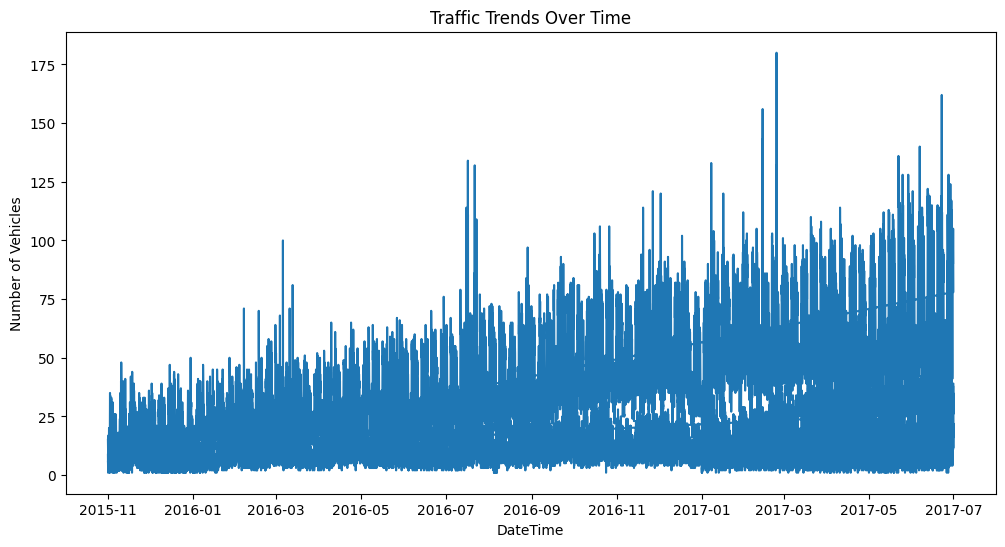

In [12]:
# Time Series Analysis: Visualize traffic trends over time
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Vehicles'])
plt.title('Traffic Trends Over Time')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.show()

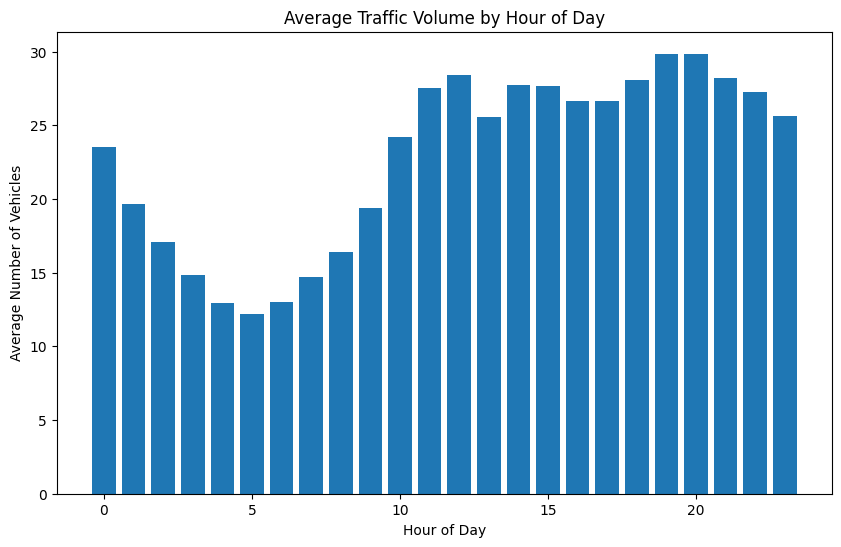

In [13]:
# Calculate average traffic volume by Hour
Avg_traffic_by_hour = df.groupby('Hour')['Vehicles'].mean().reset_index()

# Visualize average traffic volume by Hour
plt.figure(figsize=(10, 6))
plt.bar(Avg_traffic_by_hour['Hour'], Avg_traffic_by_hour['Vehicles'])
plt.title('Average Traffic Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Vehicles')
plt.show()

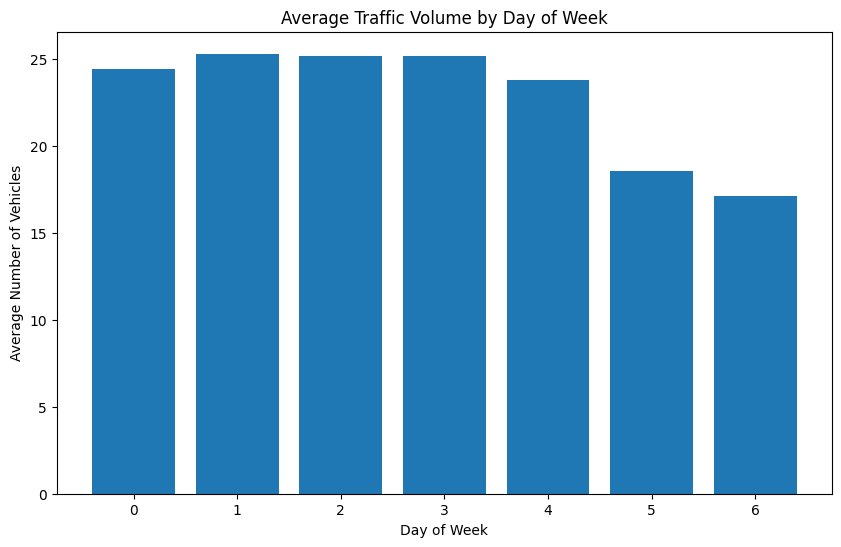

In [14]:
# Calculate average traffic volume by Day of Week
avg_traffic_by_dayofweek = df.groupby('DayOfWeek')['Vehicles'].mean().reset_index()

# Visualize average traffic volume by Day of Week
plt.figure(figsize=(10, 6))
plt.bar(avg_traffic_by_dayofweek['DayOfWeek'], avg_traffic_by_dayofweek['Vehicles'])
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Vehicles')
plt.show()

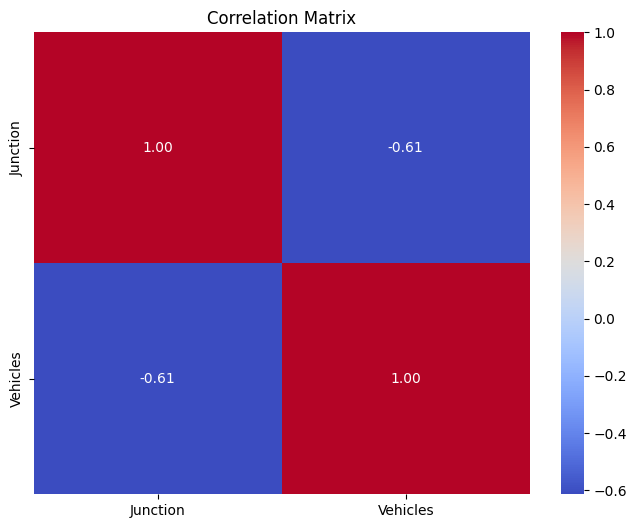

In [15]:
import seaborn as sns
# Correlation Analysis:
correlation_matrix = df[['Junction', 'Vehicles']].corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From the bar plot by hours, we can see a clear clear traffic volume is generally lower in the 12 AM to 5 AM and gradually increases throughout the day,peaking in around 6 PM to 8 PM before decreasing again.

Also, the Correlation Matrix shows a negative correlation of -0.61 between Junction and Vehicles. This suggests that junction number increases, the number of vehicles tends to decrease.

#Section C: Model Building & Evaluation

In [16]:
from sklearn.model_selection import train_test_split

# x for feature and Y for target variable
X = df[['Junction', 'Hour', 'DayOfWeek', 'Weekend']]
y = df['Vehicles']

#Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(38496, 4)
(9624, 4)


In [17]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)


LinearRegression()

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

#Evaluate model performance using RMSE and R². Compare models and comment on results.

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
linear_reg_predictions = linear_reg.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Linear Regression model
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
print(f"Linear Regression RMSE: {linear_reg_rmse}")
print(f"Linear Regression R^2: {linear_reg_r2}")


#Random Forest model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest R^2: {rf_r2}")

Linear Regression RMSE: 15.307203954169019
Linear Regression R^2: 0.44279464993816364
Random Forest RMSE: 11.57066580564384
Random Forest R^2: 0.681624059979751


Model Comparison:

The Random Forest model has a lower RMSE than the baseline Linear Regression model, indicating better prediction accuracy.
The Random Forest model has a higher R² than the  Linear Regression model, that model can explain the feature better then linear regression




#Section D: Code Analysis & Interpretation


In [20]:
# Create a DataFrame with all possible hours (0-23) and average values for other features
# Using the mean of the training data for other features to represent a typical scenario
mean_junction = X_train['Junction'].mean()
mean_dayofweek = X_train['DayOfWeek'].mean()
mean_weekend = X_train['Weekend'].mean()

hours_to_predict = pd.DataFrame({
    'Junction': [mean_junction] * 24,
    'Hour': range(24),
    'DayOfWeek': [mean_dayofweek] * 24,
    'Weekend': [mean_weekend] * 24
})

# Predict traffic volume for each hour using the Random Forest model
predicted_traffic_by_hour = rf_model.predict(hours_to_predict)

# Create a DataFrame to store hours and their predicted traffic
predicted_traffic_df = pd.DataFrame({'Hour': range(24), 'Predicted_Vehicles': predicted_traffic_by_hour})

# Sort by predicted traffic in descending order and get the top 3 hours
top_3_hours = predicted_traffic_df.sort_values(by='Predicted_Vehicles', ascending=False).head(3)

print("Top three hours with the highest predicted traffic:")
print(top_3_hours)

Top three hours with the highest predicted traffic:
    Hour  Predicted_Vehicles
20    20           21.096506
19    19           20.840769
15    15           19.509646


In [21]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
# Create a DataFrame for better visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

print("Feature Importances (Random Forest Model):")
print(features_df)

Feature Importances (Random Forest Model):
     Feature  Importance
0   Junction    0.741354
1       Hour    0.175735
2  DayOfWeek    0.044744
3    Weekend    0.038167


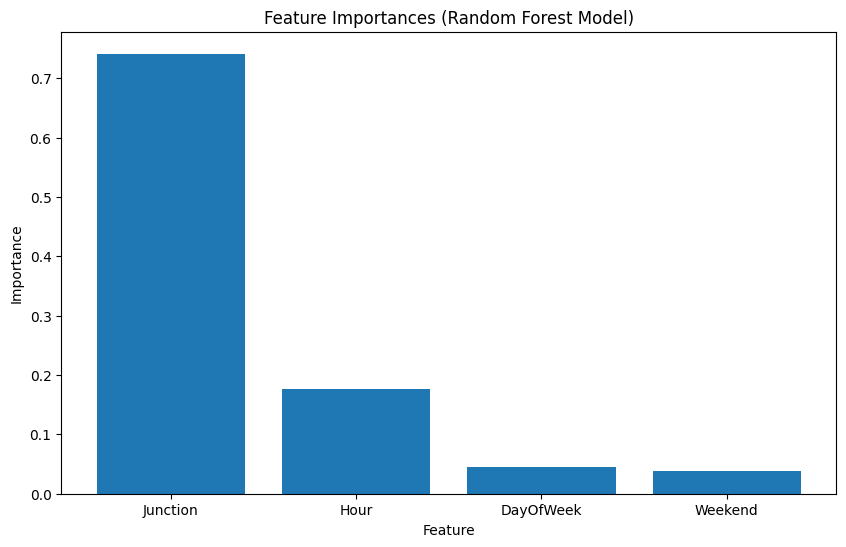

In [22]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'])
plt.title('Feature Importances (Random Forest Model)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

Based on the feature importance analysis (see plot and output above), the features that contributed the most to the Random Forest model predictions are:

Junction: This is the most important feature, indicating that the specific location (junction) has the strongest influence on traffic volume.
Hour: The hour of the day is the second most important feature, reflecting the significant daily patterns in traffic flow (e.g., rush hour).
DayOfWeek and Weekend: These features have lower importance compared to Junction and Hour, but they still contribute to the model's predictions by capturing variations in traffic between weekdays and weekends, and potentially between different weekdays.

In [23]:
# Add predictions to the test set DataFrame for comparison
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Actual_Vehicles'] = y_test
X_test_with_predictions['Predicted_Vehicles'] = rf_predictions

# Calculate the absolute error for each prediction
X_test_with_predictions['Error'] = abs(X_test_with_predictions['Actual_Vehicles'] - X_test_with_predictions['Predicted_Vehicles'])

# Sort by error in descending order to find the largest errors
largest_errors = X_test_with_predictions.sort_values(by='Error', ascending=False)

# Display the instance with the largest error
print("Instance with the largest prediction error:")
print(largest_errors.head(1))

Instance with the largest prediction error:
       Junction  Hour  DayOfWeek  Weekend  Actual_Vehicles  \
35514         3    18          3        0              132   

       Predicted_Vehicles       Error  
35514           18.967409  113.032591  


Based on the results of the Random Forest model and the feature importance analysis, here's what the machine has captured about the traffic patterns:

The model has learned that the Junction is the most significant factor influencing traffic volume, followed by the Hour of the Day. Day of the Week and Weekend status also play a role, but to a lesser extent.

Specifically:

Junction: The negative correlation observed earlier and the high feature importance indicate that different junctions have vastly different traffic volumes, and the model is leveraging this information to make predictions.
Hour of the Day: The model has captured the typical daily traffic fluctuations, recognizing that certain hours (like rush hour) have significantly higher traffic than others (like early morning).
Day of the Week and Weekend: The model has also learned that traffic patterns differ between weekdays and weekends, and potentially on specific days of the week.
The Random Forest model, which is a more complex model than linear regression, performed significantly better. This suggests that the relationships between the features and traffic volume are likely non-linear and involve interactions between the features, which the Random Forest model is better equipped to capture.

#Section E: Reflection & Learning


**Traffic Patterns**

The data clearly shows distinct traffic patterns related to the hour of the day and the day of the week. There are peak hours during the day and differences in volume between weekdays and weekends. This aligns with common sense understanding of traffic flow.


**Feature Importance**

The feature importance analysis using the Random Forest model highlights that Junction and Hour are the most influential factors in predicting traffic volume. This is a valuable insight for understanding which variables are most critical for traffic forecasting in this dataset. While DayOfWeek and Weekend are less important, they still contribute to the model's predictive power.

**Model Behavior**

Comparing the Linear Regression and Random Forest models demonstrates the benefit of using a more complex model like Random Forest for this type of data. The significantly lower RMSE and higher R² for the Random Forest model suggest that the relationships between the features and traffic volume are not purely linear and that the Random Forest model is better at capturing these non-linearities and interactions. I also saw how the Random Forest model can still have significant errors on individual predictions, which could be due to outliers or factors not included in the dataset.

Overall, this exercise reinforced the importance of exploratory data analysis to understand patterns, feature importance to identify key drivers, and model comparison to select the most appropriate model for a given task.

#Section F: Real-World Analogy & Critical Thinking

In [24]:
# Example values for prediction based on the trained model's features
next_hour_features = {
    'Junction': 1,  # Replace with the actual junction number you want to predict for
    'Hour': 8,
    'DayOfWeek': 2, # 0 for Monday, 1 for Tuesday, 2 for Wednesday, etc.
    'Weekend': 0    # 0 for weekday, 1 for weekend
}

# Create a DataFrame with the correct features
next_hour_df = pd.DataFrame([next_hour_features])

# Predict traffic volume using the trained Random Forest model
predicted_volume = rf_model.predict(next_hour_df)

print(f"Predicted traffic volume for the next hour: {predicted_volume[0]:.2f}")

Predicted traffic volume for the next hour: 37.21


Based on the predicted traffic volume for a specific junction, hour, day of the week, and weekend status, a city traffic planner can make informed real-world decisions. For example, if the model predicts high traffic volume for a particular time and location, planners could consider adjusting traffic light timings to improve flow, deploying additional traffic management personnel, or providing real-time traffic updates to commuters to suggest alternative routes. Conversely, a prediction of low traffic volume might indicate an opportunity for road maintenance or construction with minimal disruption. This type of predictive modeling allows for proactive traffic management, potentially reducing congestion and improving overall transportation efficiency within the city.

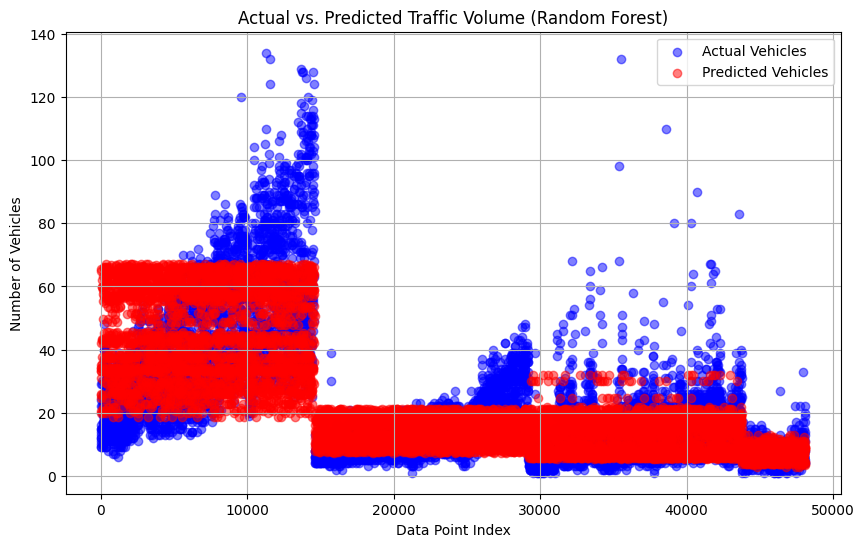

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_with_predictions.index, X_test_with_predictions['Actual_Vehicles'], color='blue', label='Actual Vehicles', alpha=0.5)
plt.scatter(X_test_with_predictions.index, X_test_with_predictions['Predicted_Vehicles'], color='red', label='Predicted Vehicles', alpha=0.5)
plt.title('Actual vs. Predicted Traffic Volume (Random Forest)')
plt.xlabel('Data Point Index')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)
plt.show()

Here's a summary of the key findings and how the model's predictions can assist city planners:

The analysis revealed distinct traffic patterns influenced primarily by the junction and the hour of the day, with day of the week and weekend status also playing a role. The Random Forest model effectively captured these patterns, outperforming a simpler linear regression model. The model's predictions can empower city traffic planners to make proactive, data-driven decisions. By anticipating high-traffic periods and locations, planners can optimize traffic light timings, allocate resources effectively, and provide timely information to commuters, ultimately leading to reduced congestion and improved urban mobility.